Iteration:  0
0.05756666666666667
Iteration:  10
0.06303333333333333
Iteration:  20
0.0678
Iteration:  30
0.07296666666666667
Iteration:  40
0.07866666666666666
Iteration:  50
0.08446666666666666
Iteration:  60
0.091
Iteration:  70
0.09756666666666666
Iteration:  80
0.10443333333333334
Iteration:  90
0.11103333333333333
Iteration:  100
0.11703333333333334
Iteration:  110
0.12373333333333333
Iteration:  120
0.13126666666666667
Iteration:  130
0.13793333333333332
Iteration:  140
0.14336666666666667
Iteration:  150
0.1495
Iteration:  160
0.15493333333333334
Iteration:  170
0.16
Iteration:  180
0.16516666666666666
Iteration:  190
0.16943333333333332
Iteration:  200
0.1731
Iteration:  210
0.17683333333333334
Iteration:  220
0.1809
Iteration:  230
0.18306666666666666
Iteration:  240
0.1861
Iteration:  250
0.1885
Iteration:  260
0.19006666666666666
Iteration:  270
0.1914
Iteration:  280
0.19316666666666665
Iteration:  290
0.19536666666666666
Iteration:  300
0.19623333333333334
Iteration:  310

<ipython-input-2-5f6750d5d1a7>:33: RuntimeWarning: overflow encountered in exp
  return np.exp(z)/np.sum(np.exp(z))
<ipython-input-2-5f6750d5d1a7>:33: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(z)/np.sum(np.exp(z))


Iteration:  980
0.1
Iteration:  990
0.1


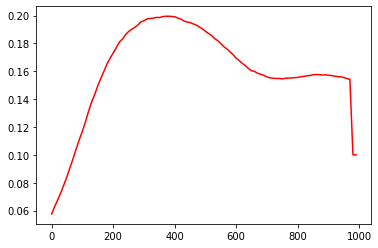

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_train.csv')
test = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_test.csv')
x = df.values[:, 2:]
y = df.values[:, 1]
x_test = test.values[:, 1:]
ids = test.values[:, 0]
m, n = df.values.shape


def sigmoid(z):
  return (1/(1 + np.exp(-z)))

def normalize(X):
    mu = X.mean(0)
    std = X.std(0)
    return (X - mu) / std

def inpar():
  w1 = np.random.rand(128,784) - 0.5
  b1 = np.random.rand(128,1) - 0.5
  w2 = np.random.rand(10,128) - 0.5
  b2 = np.random.rand(10,1) - 0.5
  return w1, b1, w2, b2

def relu(z):
  return np.maximum(0,z)

def softmax(z):
  return np.exp(z)/np.sum(np.exp(z))

def forp(w1, b1, w2, b2, x):
  z1 = w1.dot(x) + b1
  a1 = relu(z1)
  z2 = w2.dot(a1) + b2
  a2 = softmax(z2)
  return z1, a1, z2, a2

def onehot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def dRelu(z):
  return z>0

def backprop(Z1, A1, Z2, A2, W1, W2, X, Y):
    onehot_Y = onehot(Y)
    dZ2 = A2 - onehot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * dRelu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def updateparams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


def predict(a):
    return np.argmax(a, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = inpar()   
    xaxis = []
    yaxis = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forp(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateparams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        
        if i % 10 == 0:
            print("Iteration: ", i)
            xaxis.append(i)
            predictions = predict(A2)
            v = get_accuracy(predictions, Y)
            yaxis.append(v)
            print(v)
    return W1, b1, W2, b2, xaxis, yaxis


x = x / 256


x = x.T

y = y.T
W1, b1, W2, b2, xaxis, yaxis = gradient_descent(x, y, 0.0005, 1000)


plt.plot(xaxis, yaxis, color = "red")



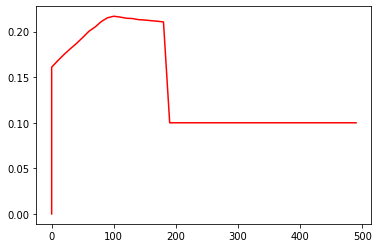

In [ ]:
plt.plot(xaxis, yaxis, color = "red")

In [ ]:
df

,Unnamed: 0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,...,70,27,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,35,0,0,0,0,0,0,0,0,0
3,3,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,1,0,3,0,...,2,0,0,91,117,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3,0,0,0,0,0,0,0,0,...,13,192,150,0,0,0,0,0,0,0
29996,29996,4,0,0,0,0,0,0,0,0,...,2,0,11,179,167,105,0,0,0,0
29997,29997,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29998,4,0,0,0,0,1,0,0,0,...,1,1,0,106,163,170,67,0,0,0


In [ ]:
import numpy as np
a = np.array([[1,2],[34,52623635]])

In [ ]:
a = a/np.linalg.norm(a)

In [ ]:
a

array([[1.90028682e-08, 3.80057364e-08],
       [6.46097519e-07, 1.00000000e+00]])

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
w1.shape

NameError: ignored